In [2]:
import os
import shutil
from pathlib import Path

# Define the extracted folder path
extracted_folder = r"C:\Users\Max\Downloads\train"  
print("Folder exists:", os.path.exists(extracted_folder))
print("Number of files in the folder:", len(os.listdir(extracted_folder)))

Folder exists: True
Number of files in the folder: 14942


In [3]:
import shutil
from pathlib import Path

# Create subfolders for organization
cat_dir = os.path.join(extracted_folder, "cats")
dog_dir = os.path.join(extracted_folder, "dogs")
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Debug file movement
for file in Path(extracted_folder).glob("*.jpg"):
    if "cat" in file.name:
        shutil.move(str(file), cat_dir)
    elif "dog" in file.name:
        shutil.move(str(file), dog_dir)

print("File organization complete.")

File organization complete.


In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Define the folders
cat_dir = r"C:\Users\Max\Downloads\train\cats" 
dog_dir = r"C:\Users\Max\Downloads\train\dogs"

def load_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            # Load and preprocess the image
            img = load_img(file_path, target_size=target_size)  # Resize image
            img_array = img_to_array(img).flatten()             # Flatten image
            images.append(img_array)
            labels.append(label)                                # Assign label
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")
    return images, labels

# Load cats and dogs
cat_images, cat_labels = load_images_from_folder(cat_dir, 0)
dog_images, dog_labels = load_images_from_folder(dog_dir, 1)

# Combine data
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

print(f"Dataset loaded: {X.shape[0]} samples with {X.shape[1]} features each.")

Dataset loaded: 14942 samples with 49152 features each.


In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (11953, 49152), Testing data: (2989, 49152)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform testing data

print("Data normalized.")

Data normalized.


In [9]:
# Initialize and train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"KNN model trained with k={k}.")

KNN model trained with k=5.


In [10]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 84.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      2538
           1       0.36      0.04      0.06       451

    accuracy                           0.85      2989
   macro avg       0.61      0.51      0.49      2989
weighted avg       0.78      0.85      0.79      2989



In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the test image
test_image_path = r"C:\Users\Max\Downloads\cat_test.jpg"

# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(128, 128))  # Resize to match training images
test_image_array = img_to_array(test_image).flatten()         # Flatten the image
test_image_array = scaler.transform([test_image_array])       # Normalize the image

print("Test image loaded and preprocessed.")

Test image loaded and preprocessed.


In [18]:
# Predict the label (0 for cat, 1 for dog)
predicted_label = knn.predict(test_image_array)

# Map the label to class name
class_map = {0: "Cat", 1: "Dog"}

# Extract the predicted label (it's already a scalar)
predicted_class = class_map[predicted_label[0]]  # Directly use predicted_label[0]

print(f"Predicted class: {predicted_class}")

Predicted class: Cat


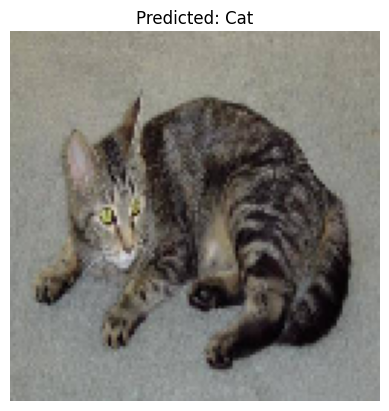

In [19]:
import matplotlib.pyplot as plt

# Display the test image
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()
